# Learning outcomes
- image histogram
- histogram equalization and CLAHE(improved version of histogram equalization)
- Thresholding
    - Global thresholding
    - Otsu thresholding
- Color spaces (RGB, L\*a\*b, HSV)
- Demo on color based segmentation

## Setup

In [42]:
import sys
assert sys.version_info >= (3,7)
!pip install matplotlib
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Image histogram

In [24]:

img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\lena.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [25]:
#2 ways to compute histogram
%timeit hist = cv.calcHist([gray],[0],None,[256], [0,256])
%timeit hist, _ = np.histogram(gray.flatten(), 256)

24.4 µs ± 762 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
779 µs ± 30.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


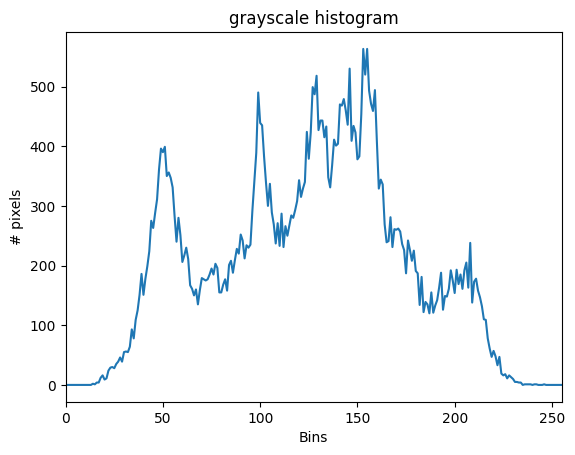

In [26]:
#plot the histogram
hist = cv.calcHist([gray],[0],None,[256], [0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0,255])
plt.show()

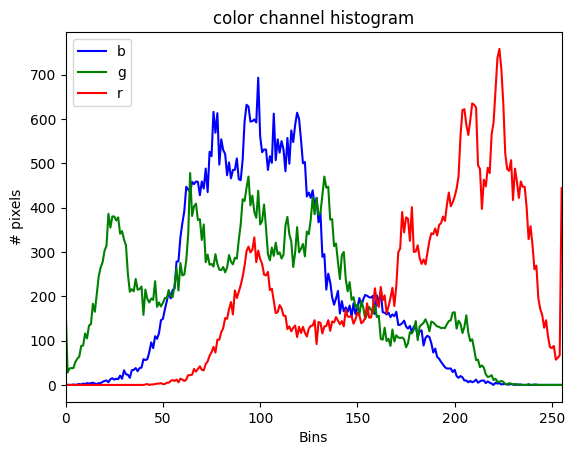

In [27]:
#for each channel 
channels = cv.split(img)
colors = ('b','g','r')

plt.figure()
plt.title("color channel histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for ch, color in zip(channels, colors):
    hist = cv.calcHist([ch],[0],None,[256], [0,256])
    plt.plot(hist,color=color, label=color)
    
plt.xlim([0,255])
plt.legend()
plt.show()

In [17]:
hist.shape

(256, 1)

In [28]:
img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\low_contrast_img.jfif",0)
show_img("low contrast",img)

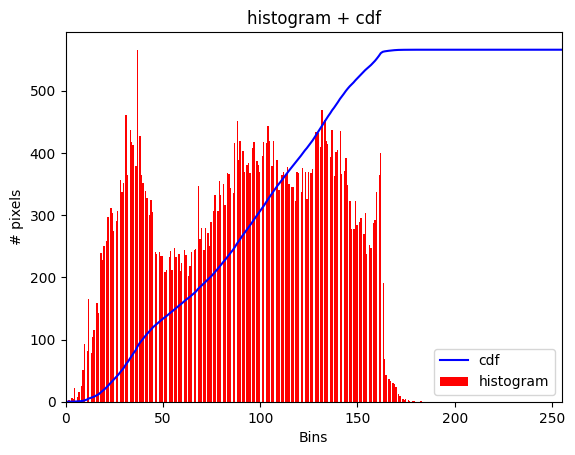

In [29]:
#histogram equalization
hist = cv.calcHist([img],[0],None,[256], [0,256])

#cumulative distribution function
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

#plot
plt.figure()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(),256, color='r')
plt.title("histogram + cdf")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0,255])
plt.legend(("cdf","histogram"))
plt.show()

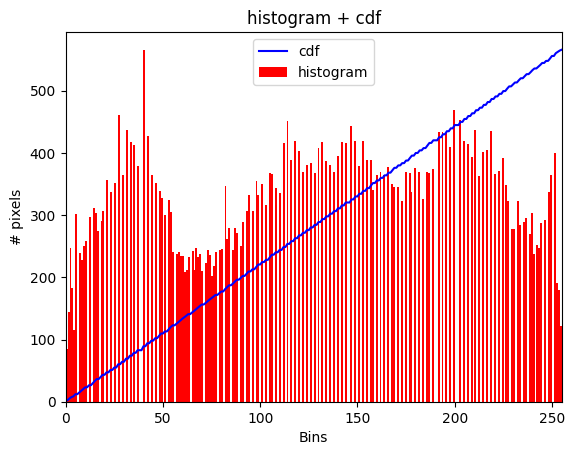

In [30]:
#equalization
eq = cv.equalizeHist(img)

hist = cv.calcHist([eq],[0],None,[256], [0,256])

#cumulative distribution function
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

#plot
plt.figure()
plt.plot(cdf_normalized, color='b')
plt.hist(eq.flatten(),256, color='r')
plt.title("histogram + cdf")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0,255])
plt.legend(("cdf","histogram"))
plt.show()

In [31]:
cv.imshow("original",img)
show_img("histogram equalization",eq)

## CLAHE (variants of histogram equalization)

In [32]:
img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\winter.jfif",0)

#equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit = 3, tileGridSize=(8,8))
dst = clahe.apply(img)

cv.imshow("original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)

## Exercise 1

In [26]:
img = cv.imread("images/winter.jfif",0)

#equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit = 3, tileGridSize=(8,8))
dst = clahe.apply(img)

cv.imshow("original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)

In [33]:
[i for i in dir(cv)if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [34]:
img = np.fromfunction(lambda i,j:j,(50,256), dtype=np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img,x,255,cv.THRESH_BINARY)
    _, img2 = cv.threshold(img,x,255,cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img,x,255,cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img,x,255,cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img,x,255,cv.THRESH_TOZERO_INV)
    
    cv.imshow("combined", np.vstack((img1,img2,img3,img4,img5)))
    
cv.namedWindow("combined")
cv.createTrackbar("threshold", "combined", 50,255,trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

In [43]:
img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\noisy.jfif",0)
show_img("noisy",img)

NameError: name 'plt_img' is not defined

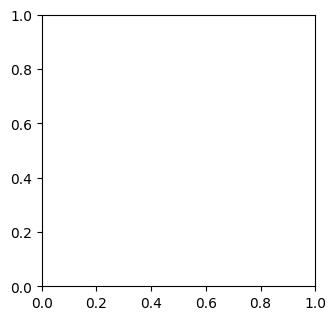

In [42]:
# 3 different versions of thresholding

#1: global threshold

th1 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)[1]

#2: otsu threshold
th2 = cv.threshold(img,0,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

#3: Gaussian blurring
blur = cv.GaussianBlur(img,(5,5),0)
th3 = cv.threshold(blur,0,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]


imgs = [img,0,th1,
       img,0,th2,
       blur,0,th3]
titles = ("original", "histogram", "global threshold",
         "original", "histogram","otsu thresholding",
         "blur", "histogram","otsu thresholding")

fig = plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(3,3,3*i+1),plt_img(imgs[3*i],title = titles[3*i])
    plt.subplot(3,3,3*i+2),plt.hist(imgs[3*i].flatten(),256)
    plt.title(titles[3*i+1])
    plt.subplot(3,3,3*i+3), plt_img(imgs[3*i+2],title=titles[3*i+2])


In [41]:
# erosion
kernel = np.ones((3,3),dtype=np.uint8)

dst = cv.erode(th3,kernel,iterations = 1)

img_combined = np.hstack((th3,dst))

show_img("erosion",img_combined)

In [44]:
# dilation
kernel = np.ones((3,3),dtype=np.uint8)

dst = cv.dilate(th3,kernel,iterations = 1)

img_combined = np.hstack((th3,dst))

show_img("dilation",img_combined)

In [45]:
# control kernel size and iterations
# closing
#setup trackbar and while loop

def trackbar(x):
    pass

wn="window"
cv.namedWindow(wn)
cv.createTrackbar("size",wn,3,10,trackbar)
cv.createTrackbar("iter",wn,2,10,trackbar)

while (1):
    #retrieve size and iterations
    size=cv.getTrackbarPos("size",wn)
    if size <3:
        size = 3
    iterations = cv.getTrackbarPos("iter",wn)
    if iterations <1:
        iterations = 1
        
    kernel = np.ones((size,size),dtype = np.uint8)
    #opening (erosion + dilation)
    #closing (dilation + erosion)
    res = cv.morphologyEx(th3,cv.MORPH_CLOSE, kernel,iterations=iterations)
    cv.imshow(wn,res)
    k=cv.waitKey(1)&0xFF
    if k==27:
        break
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


In [51]:
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## Color spaces
- RGB
- L\*a\*b. Perceptual uniformity. Made to mimic human vision
- HSV: hue, saturation, value
    - hue encodes color
    - saturation is the purity of the color. The higher the value the purer
    - value is brightness / illumination. if V is very high, there are strong light reflected from the surface. if V is low, the object appear dark.
    - set up a pair of tuples $(H_1, S_1, V_1)$ and $(H_2, S_2, V_2)$ for color segmentation.

- CIELAB: L channel encodes lightness while a and b channels represent color.

In [47]:
img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\lena.jfif")

img_lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)

l,a,b = cv.split(img_lab)

#sharpening kernel
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
l_sharpened = cv.filter2D(l,-1,kernel)

#merge
sharpened = cv.merge((l_sharpened,a,b))

#back to bgr
sharpened = cv.cvtColor(sharpened, cv.COLOR_Lab2BGR)

cv.imshow("lena",img)
show_img("sharpen",sharpened)

### Demo of color based segmentation

In [50]:
img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\pant.jfif")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt_img(img)

NameError: name 'plt_img' is not defined

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm


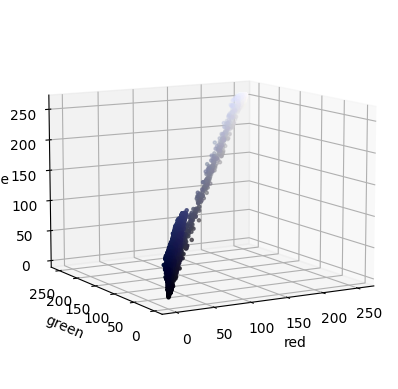

In [52]:
#visualize the pixels in 3D plots (RGB dimenstional space)
r,g,b = cv.split(img)

fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection='3d')

pixel_colors = img.reshape((-1,3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(),g.ravel(),b.ravel(), facecolors = pixel_colors, marker = '.')
axis.view_init(elev=10,azim=240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

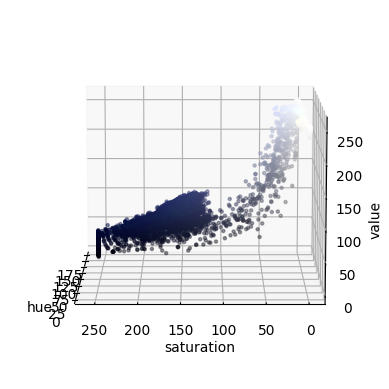

In [57]:
img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection='3d')

pixel_colors = img.reshape((-1,3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(),s.ravel(),v.ravel(), facecolors = pixel_colors, marker = '.')
axis.view_init(elev=10,azim=180)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

NameError: name 'plt_img' is not defined

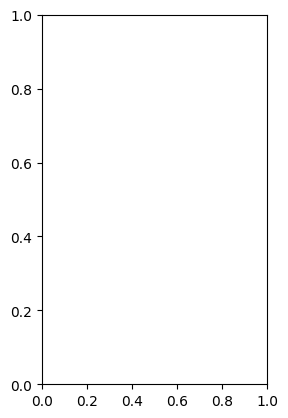

In [58]:
#visualize the low blue and the high blue color
blue_low = (85,90,0)
blue_high = (125,255,160)

square1 = np.full((10,10,3), blue_low,dtype=np.uint8)
square2 = np.full((10,10,3), blue_high,dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1,cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2,cv.COLOR_HSV2RGB))
plt.show()

NameError: name 'plt_img' is not defined

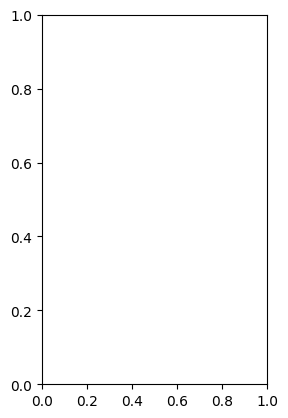

In [59]:
#color segmentation
mask = cv.inRange(img_hsv,blue_low,blue_high)
res = cv.bitwise_and(img,img,mask=mask)

plt.subplot(121),plt_img(mask)
plt.subplot(122),plt_img(res)
plt.show()

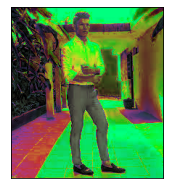

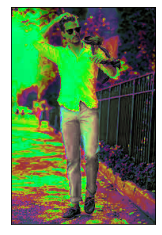

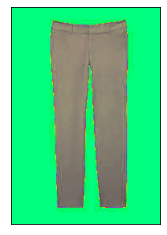

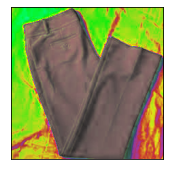

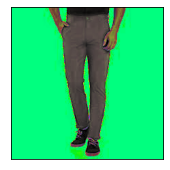

In [91]:
list = []
def colorThreshold(img):
    img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    mask = cv.inRange(img,blue_low,blue_high)
    res = cv.bitwise_and(img,img,mask=mask)
    plt.subplot(122), plt_img(cv.cvtColor(img,cv.COLOR_HSV2RGB))
    plt.show()
    
for i in range(1,6):
    img = cv.imread('images/color_space/pant'+str(i)+'.jfif')
    
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    colorThreshold(img)



In [61]:
def color_seg(img,color_low,color_high,smooth=True):
    """Args:
    img: source image
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)"""
    
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
    
    #HSV
    img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    #inRange function
    mask = cv.inRange(img_hsv, color_low,color_high)
    
    # morphological operations
    mask = cv.erode(mask, None, iterations = 2)
    mask = cv.dilate(mask, None, iterations = 2)
    
    return cv.bitwise_and(img_ori,img_ori,mask=mask)

imgs = []
for i in range(1,6): #1-5
    img = cv.imread(cv.samples.findFile(fr"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\pant{i}.jfif"))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low, blue_high) for img in imgs]

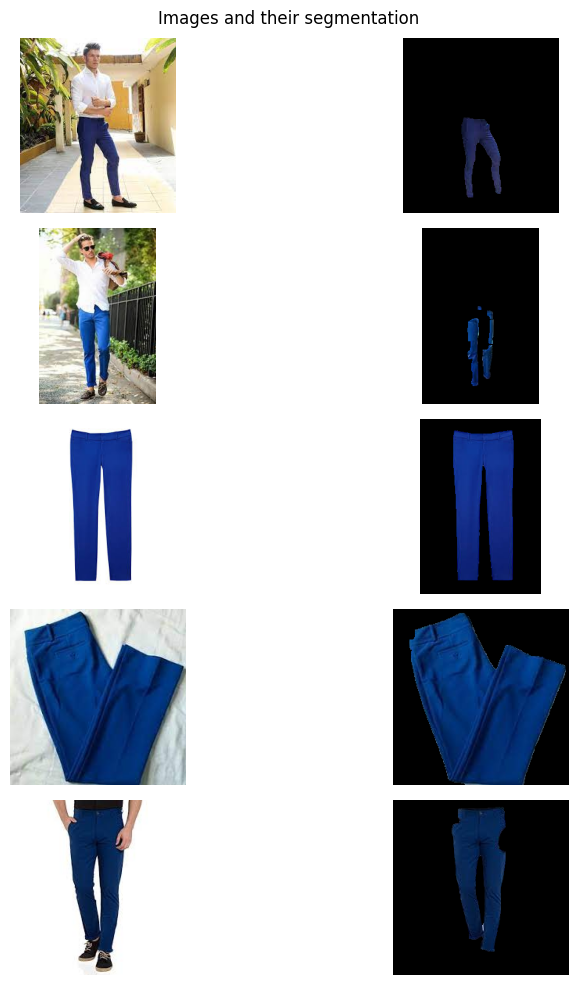

In [62]:
fig,ax = plt.subplots(5,2,figsize=(10,10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Images and their segmentation")
plt.tight_layout()
plt.show()

## exercise 1


In [40]:
# Step 1
img = cv.imread(r'C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\boat.jpg', 0)

# Step 2
th = cv.threshold(img, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

# Step 3
contours, hierarchy = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(th, contours, -1, (0, 0, 0), 2)
contourAreaList = []
for contour in contours:
    area = cv.contourArea(contour)
    contourAreaList.append(area)
x, y, w, h = cv.boundingRect(contours[contourAreaList.index(max(contourAreaList))])
cv.rectangle(th, (x,y), (x+w,y+h), 255, 2)
cv.rectangle(img, (x,y), (x+w,y+h), 255, 2)

img_combined = np.hstack((th, img))

show_img("Result", img_combined)

## exercise 2


In [41]:
import cv2
import numpy as np

# Function to update the displayed image based on the selected structuring element size
def update_image(val):
    size = cv2.getTrackbarPos('SE Size', 'Morphological Transformations')
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))

    erosion = cv2.erode(thresholded, kernel, iterations=1)
    dilation = cv2.dilate(thresholded, kernel, iterations=1)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('Erosion', erosion)
    cv2.imshow('Dilation', dilation)
    cv2.imshow('Opening', opening)
    cv2.imshow('Closing', closing)

# Load the image
image = cv2.imread(r'C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\leaf.jfif', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform thresholding
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create a window and trackbar
cv2.namedWindow('Morphological Transformations')
cv2.createTrackbar('SE Size', 'Morphological Transformations', 3, 21, update_image)

# Initialize the GUI with the default structuring element size
update_image(3)

# Main loop
while True:
    key = cv2.waitKey(1)
    if key == 27:  # Press 'Esc' to exit
        break

cv2.destroyAllWindows()


error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\filterengine.hpp:367: error: (-215:Assertion failed) anchor.inside(Rect(0, 0, ksize.width, ksize.height)) in function 'cv::normalizeAnchor'


error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\filterengine.hpp:367: error: (-215:Assertion failed) anchor.inside(Rect(0, 0, ksize.width, ksize.height)) in function 'cv::normalizeAnchor'


KeyboardInterrupt: 

## exercise 3


NameError: name 'plt_img' is not defined

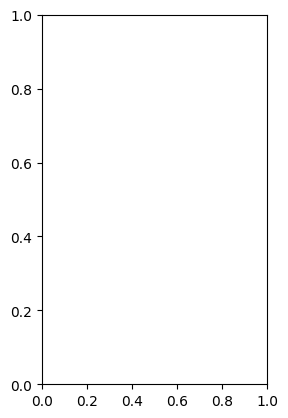

In [44]:
list = []
#visualize the low blue and the high blue color
blue_low = (85,90,0)
blue_high = (125,255,160)
def colorThreshold(img):
    img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    mask = cv.inRange(img,blue_low,blue_high)
    res = cv.bitwise_and(img,img,mask=mask)
    plt.subplot(122), plt_img(cv.cvtColor(img,cv.COLOR_HSV2RGB))
    plt.show()
    
for i in range(1,6):
    img = cv.imread(r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\porcelain"+str(i)+'.jfif')
    
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    colorThreshold(img)

In [45]:
def color_seg(img,color_low,color_high,smooth=True):
    """Args:
    img: source image
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)"""
    
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
    
    #HSV
    img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    #inRange function
    mask = cv.inRange(img_hsv, color_low,color_high)
    
    # morphological operations
    mask = cv.erode(mask, None, iterations = 2)
    mask = cv.dilate(mask, None, iterations = 2)
    
    return cv.bitwise_and(img_ori,img_ori,mask=mask)

imgs = []
for i in range(1,6): #1-5
    img = cv.imread(cv.samples.findFile(fr"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 6\porcelain{i}.jfif"))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low, blue_high) for img in imgs]

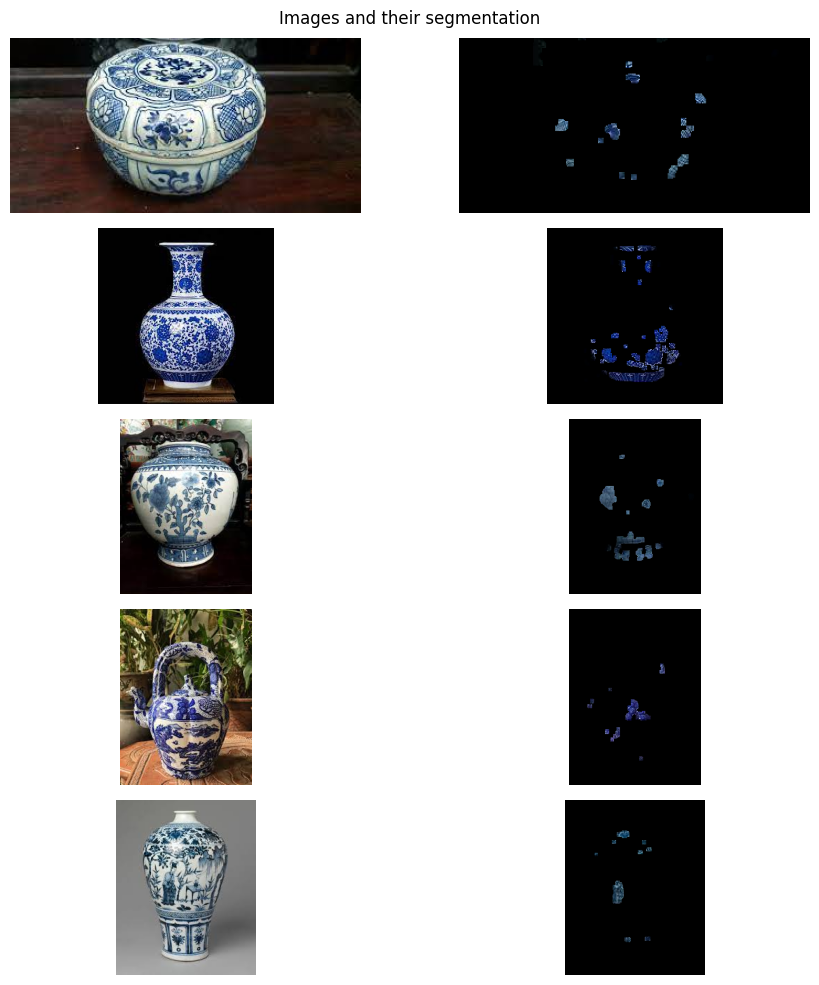

In [46]:
fig,ax = plt.subplots(5,2,figsize=(10,10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Images and their segmentation")
plt.tight_layout()
plt.show()